# Principal Components Analysis Explained

## Why do we need PCA?

In real world data sets, many of our variables are unimportant or correlated with each other. If we are doing a supervised machine learning task, leaving in variables unrelated to our target variable lowers the signal to noise ratio in our training data, making it harder to construct a good model. Leaving correlated variables in our training data can cause issues with multicollinearity depending on the modeling method used.

One possible way around these issues is to remove the irrelevant variables. The problem is how to decide a variable is irrelevant. You could use a technique like best subset selection via AIC, or recursive feature elimination (but NEVER step-wise regression), but using your training data to select variables can introduce bias into our estimates of mean squared error and other important estimators of model quality.

Another approach to this problem is dimensionality reduction; which involves finding a lower dimensional representation of the data. If we can find a sub-space of our original data that retains almost all of the relevant information, we can have an easier time estimating models. If the sub-space is small enough, it can make tasks like clustering or models dependent on distance metrics a feasible option because we avoid the curse of dimensionality. 

The most popular method for finding a lower dimensional representation of a data set is Principal Components Analysis (PCA), which finds linear combinations of the variables in a training data set which maximize the variance explained by each linear combination, subject to some constraints. We go deeper in the next section.

## What is PCA?

Suppose we have a matrix, with n rows (observations) and k columns (variables). Lets call this matrix, **X**. We want to find linear combinations of the form: 

### $Y_i = X a_i = \begin{bmatrix} a_{i,1} x_{1,1} + a_{i,2} x_{1,2} + ... + a_{i,k} x_{1,k} \\ a_{i,1} x_{2,1} + a_{i,2} x_{2,2} + ... + a_{i,k} x_{2,k} \\ .  \\ .  \\ .  \\ a_{i,1} x_{n,1} + a_{i,2} x_{n,2} + ... + a_{i,k} x_{n,k} \end{bmatrix}$

where $a_i$ is a column vector for i = 1, 2, ... , k which explain the maximum amount of variability in **X** and each linear combination is orthogonal (at a right angle) to the others. We want the linear combinations to be orthogonal to each other so each principal component is picking up different information.

To find the linear combinations of **X**'s columns that maximize the variance of the linear combination, we need to solve:

### $a_1 = argmax_{a_1}[Var(X a_1)]$

One way is to maximize the variance of the linear combination is to make the weight of each column infinity. To keep every element in $a_1$ from being infinity, we need to impose a restraint on $a_1$. The way we do this in PCA is force the sum of the squared elements in $a_1$ to be 1. Therefore, to find the first principal component, we need to find:

### $a_1 = argmax_{a_1}[Var(X a_1)]$, s.t. $a_1^T a_1 = 1$

To find the second principal component, we need to impose the additional constraint that $a_2$ is orthogonal to $a_1$.

### $a_2 = argmax_{a_2}[Var(X a_2)]$, s.t. $a_2^T a_2 = 1$ and $a_1^T a_2 = 0$

For each additional component until we reach k, we add orthogonality restraints for all the preceding components.

Instead of needing to iteratively solve constrained maximization problems, it turns out that the eigenvectors of the covariance matrix of the data are the principal components, so we can just solve for those. We order the eigenvectors of the sample covariance matrix by their corresponding eigenvalues (largest to smallest) to get the ordered principal components. The eigenvalues are the variance explained by their corresponding eigenvectors. 

I'm assuming you've taken a linear algebra course, so I won't cover how to find eigenvectors and eigenvalues here, but you can find an example here (https://lpsa.swarthmore.edu/MtrxVibe/EigMat/MatrixEigen.html) for a refresher. I also highly recommend 3Blue1Brown's video for a graphical interpretation (https://www.youtube.com/watch?v=PFDu9oVAE-g). If your linear algebra class was heavy on memorization like mine was, I recommend you watch 3Blue1Brown's entire Essence of Linear Algebra series (https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab). The visualizations in these videos really helped me understand the concepts that I had previously just memorized.


## How do we perform PCA?

It is important to rescale all the columns in **X** so each variable is on the same scale using standardization (https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)). Getting all the variables on the same scale ensures that one variable won't dominate a principal component due to the units in which it is measured.

Suppose we have a matrix, , **X**, with n rows (observations) and k columns (variables), where each column has been scaled to have a mean of 0 and standard deviation of 1.

### Step 1: Calculate the Sample Covariance Matrix of the Data (note: this is equal to the correlation matrix with standardized data)

### $S = Cov(X)$

### Step 2: Solve for $\lambda$s (eigenvalues) and $v$s (eigenvectors) satisfying the equations below

### $Sv_1 = (\lambda_1 I_{k}) v_1$, $Sv_2 = (\lambda_2 I_{k}) v_2$, ..., and $Sv_k = (\lambda_k I_{k}) v_k$

### Step 3: Order the eigenvalues in order of largest to smallest and order the eigenvectors in order of their corresponding eigenvalues

### $\vec{\lambda} = \begin{bmatrix} \lambda_{largest} & ... & \lambda_{smallest} \end{bmatrix}$

### $V = \begin{bmatrix} v_{\lambda_{largest}} & ... & v_{\lambda_{smallest}} \end{bmatrix}$

### Step 4: Decide how many Principal Components to keep

Once we have our principal components, we need to decide how many to keep. This is done by rules of thumb. The two I am most familiar with are: 

**1**: Cutting off when the variance explained by the *ith* principal component drops below the average variance explained 

### $TotalVariance = trace(S)$,  note: $trace(S) = k$ if the data is standardized

### $AverageVariance = \Sigma^k_{i=1}\frac{\lambda_i}{TotalVariance}$

Select 1st to i-1 th principal components when $\lambda_i < AverageVariance$

**2**: Cutting off the number components at the "elbow" in a scree plot, which is the variance explained on the y-axis and the ordered Principal Components on the x-axis. In the example below, we would use only the first 6 (at tick mark 5 on the x-axis because of 0 indexing) principal components based off of this rule of thumb.

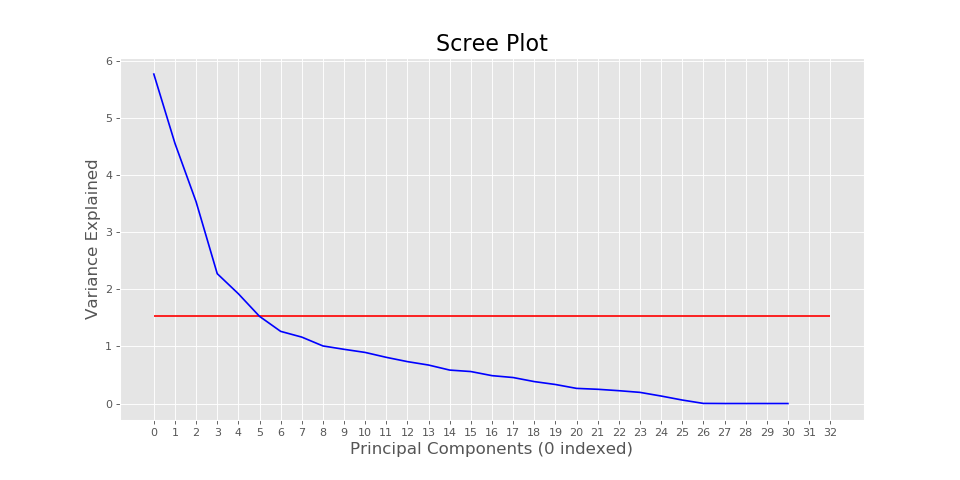

In [1]:
from IPython.display import Image, display

image_name = 'screeplot.png'

display(Image(filename=image_name))

### Step 5: Transform the Data

Let's call ***m*** the number of Principal Components we've chosen to keep.

# $R = V_{1:k, 1:m}$

# $Z = X R$

We are now ready to use **Z**, a matrix of what are called principal component scores, for the purposes of clustering, regression, or whatever we set out to do with our original data set.

I've built a Python class in the directory above this notebook that is able to perform PCA, set the number of components, and transform data.

In [2]:
import pandas as pd
import numpy as np
import os

current_path = os.sys.path[0]
os.chdir(current_path.replace("\\test", ""))

from PrincipalComponentsAnalysis import PCA

os.chdir(current_path)

To help visualize what PCA is doing, I generated some random data with 2 dimensions where there is a linear relationship between the variables. After generating the data, I standardized it for plotting and fit the PCA object to the data. Then I plotted the standardized data along with the 2 principal components. The first one is purple and the second is blue. As you can see, the first principal component points in the direction of the most variation in the data. The second is orthogonal to the first and points in the direction of the second most variation in the data. I overlayed a unit circle to emphasize the length of each vector is 1. Now let's apply PCA to a real problem.

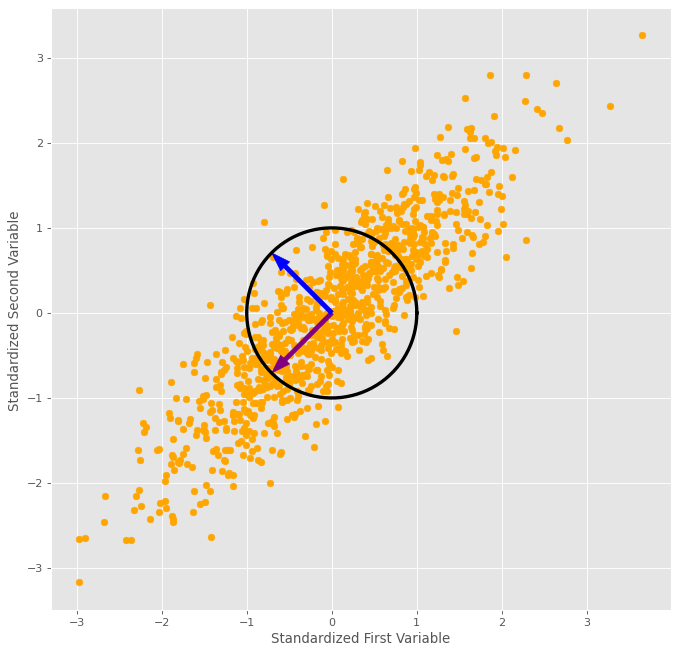

In [3]:
# for visualizations
import matplotlib.pyplot as plt

np.random.seed(3)

# generate linearly related data
x1 = np.random.normal(size=1000, loc=3, scale=3)
x2 = 3*x1 + np.random.normal(size=1000, loc=5, scale=5)
# combine x1 and x2 into a single array where x1 and x2 are columns
X = pd.DataFrame(np.array([x1, x2]).T)
# standardize the data for plotting later
X_stdrdzd = (X - X.mean()) / X.std()

# spin up an instance of the PCA class
prac_PCA = PCA()
# fit to the standardized X data
prac_PCA.fit(X_stdrdzd, standardize=False)

# set the origin to 0, 0 since the data is already standardized
origin = (prac_PCA.x_bar[0], prac_PCA.x_bar[1])
# get the eigenvectors
loadings_1 = prac_PCA.components[0,:]
loadings_2 = prac_PCA.components[1,:]

# set the plot style to ggplot
plt.style.use('ggplot')
# set figsize and create an axis
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
# make a scatter plot with the standardized data
ax.scatter(X_stdrdzd.iloc[:, 0], X_stdrdzd.iloc[:, 1], color='orange')
# add the first loading vector
ax.arrow(x=origin[0], y=origin[1], 
         dx=loadings_1[0], 
         dy=loadings_1[1],
         color='purple',
         width=0.05,
         head_width=0.15,
         length_includes_head=True)
# add the second loading vector
ax.arrow(x=origin[0], y=origin[1], 
         dx=loadings_2[0], 
         dy=loadings_2[1],
         color='b',
         width=0.05,
         head_width=0.15,
         length_includes_head=True)
# add a unit circle to show the loading vectors have length 1
t = np.linspace(0,np.pi*2,100)
ax.plot(np.cos(t), np.sin(t), linewidth=3, color='k')
# make sure the aspect ratio is equal so orthogonal vectors are at right angles
ax.set_aspect(aspect='equal')
# add 
ax.set_xlabel('Standardized First Variable')
ax.set_ylabel('Standardized Second Variable ')

plt.show();

## How do we use PCA in practice?

To give a practical example of PCA, I used some data I have from another project. It contains 2015 census tract demographic data aggregated up to the county level. I then added the vote share for Hilary Clinton and Donald Trump in each county and from that figured out who won the county. If you want the raw data and code I used to wrangle the data, send me a message and I'll be happy to share it.

The variables in the dataset include total population, the proportion of gender, race, ethnic background, how people commute and the commute duration, as well as the proportion of people publicly, privately, self-, or unemployed, the proportions employed in various industries, and the per capita income.

As you may suspect, the proportion of publicly employed, privately employed, self-employed, and unemployed should sum to 1. There are a couple of other sets of variables in this data set fitting this same pattern meaning some variables are redundant. We will see this in the PCA. If we weren't doing PCA, we would drop one of the variables from each set of the linearly dependent columns, but we'll leave them in here.

We will be comparing the performance of a K-Nearest Neighbors (K-NN) Classifier on the un-transformed data vs. transformed data in predicting whether Trump or Clinton won more votes in the county. This isn't really a good problem since the 2016 election is over and there will never be new observations to predict. This data set would be better suited for data exploration and identifying what demographic characteristics correlate with electoral outcomes. That being said, exploring demographic variables and the 2016 US election isn't the point of this article; how to apply PCA is point of this section.

I chose the K-NN classifier because it relies on distance to find the closest points to an out-of-sample observation. Things [what things] get farther and farther apart as the number of dimensions increase (see: Curse of Diminsionality: https://en.wikipedia.org/wiki/Curse_of_dimensionality). For this reason, we should expect a K-NN Classifier trained on a small number of linear combinations of the data to outperform one trained on the raw data set, conditional that the linear combinations capture meaningful relationships.

In [4]:
# for reproducibility
np.random.seed(3)

# read in the data
county_df = pd.read_csv('2016 County Demographic Data and Presidential Election Data.csv')

# create a column that is 'Clinton' if Clinton won the County and 'Trump' otherwise
county_df['Winner'] = np.where(county_df['clinton_win'] == True, 'Clinton', 'Trump')
# drop the other columns regarding the electoral outcome
county_df.drop(['per_dem', 'per_gop', 'clinton_win'], axis=1, inplace=True)

# Separate the different species into 80% training and 20% testing
train = county_df.sample(frac=0.8)
test = county_df[~county_df.index.isin(train.index)]

# separate the independent variables from the labels
train_X, train_labels = train.drop(['StateCounty', 'Winner'], axis=1), train['Winner']
test_X, test_labels = test.drop(['StateCounty', 'Winner'], axis=1), test['Winner']

# show the first 5 rows
county_df.tail()

,StateCounty,TotalPop,Men,Women,Citizen,MeanCommute,Employed,Hispanic_,White_,Black_,...,Walk_,OtherTransp_,WorkAtHome_,PrivateWork_,PublicWork_,SelfEmployed_,FamilyWork_,Unemployment_,income_weighted,Winner
3041,Wyoming_Sweetwater,44772,0.521732,0.478268,0.691615,21.02323,0.513937,0.157755,0.798535,0.008264,...,0.025395,0.009604,0.016551,0.783525,0.178616,0.037121,0.000447,0.054141,30568.38,Trump
3042,Wyoming_Teton,22311,0.517099,0.482901,0.733764,14.44336,0.640850,0.151360,0.811931,0.001614,...,0.104029,0.049662,0.055219,0.812380,0.111559,0.076106,0.000000,0.026579,44230.96,Clinton
3043,Wyoming_Uinta,20930,0.508170,0.491830,0.685953,20.38710,0.480841,0.088581,0.878022,0.001672,...,0.028380,0.016054,0.030817,0.754706,0.189107,0.055853,0.000334,0.044052,25771.62,Trump
3044,Wyoming_Washakie,8400,0.493333,0.506667,0.725000,12.35757,0.463333,0.139643,0.823809,0.007024,...,0.062381,0.028214,0.044286,0.704762,0.214762,0.075952,0.004643,0.067738,27394.17,Trump
3045,Wyoming_Weston,7152,0.516639,0.483361,0.780481,28.71264,0.467422,0.032299,0.921980,0.001957,...,0.034815,0.011605,0.056068,0.701762,0.202321,0.083613,0.012724,0.052293,30245.37,Trump


Now that we have all of our data separated, we can perform PCA. Using the rule of thumb for the scree plot, we would keep the first 6 principal components of the data.  

Stopping when the variance explained by a component drops below the average variance explained would lead us to keep the first 9 principal components. Because the data is standardized and there are 31 variables, the total variance is 31. Divide total variance by the number of variables and you get 1. The 10th principal component explains about 0.9 out of the total variance of 31, so it is below that cut-off.

Because points are farther apart in higher dimensions, I will go with the first 6 principal components, instead of the first 9, for the purposes of modeling.

In [5]:
# create an instance of the PCA class
county_PCA = PCA()
# find the principal components of the data, standardizing it first
county_PCA.fit(train_X, standardize=True)

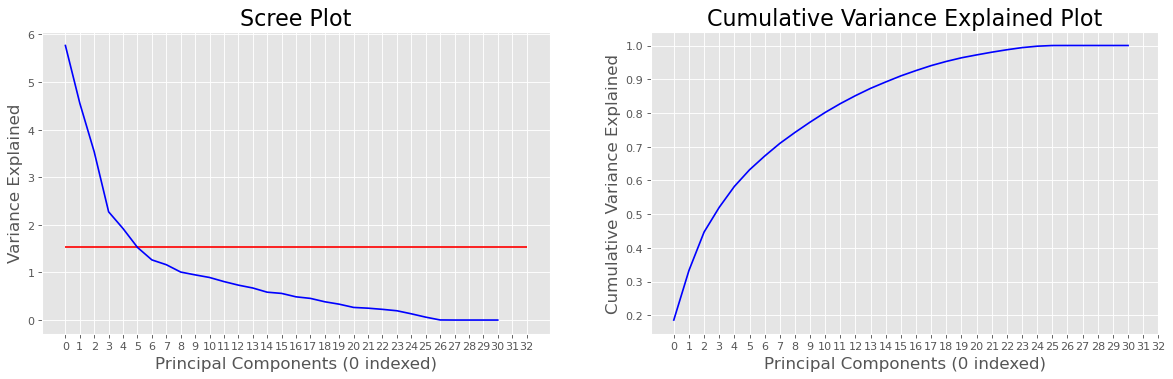

In [6]:
# set the plot style to ggplot
plt.style.use('ggplot')
plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
# start the first plot
plt.subplot(1, 2, 1)
# plot the ratio explained of the principal components
plt.plot(county_PCA.variance_explained, color='b')
plt.xlabel('Principal Components (0 indexed)', fontsize=15)
plt.ylabel('Variance Explained', fontsize=15)
plt.title('Scree Plot', fontsize=20)
plt.xticks([i for i in range(len(train.columns.tolist()))])
plt.hlines(y=county_PCA.variance_explained[5], xmin=0, xmax=len(train.columns.tolist()) - 1, color='r')

# start the second plot
plt.subplot(1, 2, 2)
# plot the cumulative ratio explained of the principal components
plt.plot(county_PCA.cumulative_ratio_var_explained, color='b')
plt.xlabel('Principal Components (0 indexed)', fontsize=15)
plt.ylabel('Cumulative Variance Explained', fontsize=15)
plt.title('Cumulative Variance Explained Plot', fontsize=20)
plt.xticks([i for i in range(len(train.columns.tolist()))])
# display the plot
plt.show();

I printed out the variance explained by each principal component below along with the ratio of total variance explained and the cumulative sum of that ratio. Above I said that some of the variables were inherently linear combinations of the others. This is shown in the last several principal components. The last 5 explain approximately 0 variance suggesting there are 5 variables that are linear combinations of the other variables.

These groups of variables that should sum to 1 include the variables on gender proportions, race and ethnic background proportions, industry employment proportions, proportion of main commute method, and employment status. So although there are 31 variables in the un-transformed data, there are really only 26.

In [7]:
temp_cols = ['PC ' + str(i) for i in range(1, 1 + len(train_X.columns.tolist()))]

pd.DataFrame([county_PCA.variance_explained, 
              county_PCA.ratio_var_explained, 
              county_PCA.cumulative_ratio_var_explained],
            index=['Variance Explained', 
                   'Ratio of Total Variance Explained', 
                   'Cumulative Ratio of Total Variance Explained'],
            columns=temp_cols).T

,Variance Explained,Ratio of Total Variance Explained,Cumulative Ratio of Total Variance Explained
PC 1,5.766798e+00,0.186026,0.186026
PC 2,4.553790e+00,0.146896,0.332922
PC 3,3.532020e+00,0.113936,0.446858
PC 4,2.272978e+00,0.073322,0.520180
PC 5,1.921427e+00,0.061982,0.582162
PC 6,1.526288e+00,0.049235,0.631397
PC 7,1.263287e+00,0.040751,0.672148
PC 8,1.162721e+00,0.037507,0.709655
PC 9,1.008036e+00,0.032517,0.742172
PC 10,9.490122e-01,0.030613,0.772785


In [8]:
# keep only the first 3 componens
county_PCA.keep_n_components(6)

# transfrom the training and testing independent variables
train_X_pca, test_X_pca = county_PCA.transform(train_X), county_PCA.transform(test_X)

Although we are keeping 6 principal components, we can visualize the first 3 and add color coded labels (blue for a Clinton win and red for a Trump win). By doing so, we can see the that Clinton counties and Trump counties are not fully separable in the space spanned by the first 3 principal components, but there are clearly differences in demography between those counties.

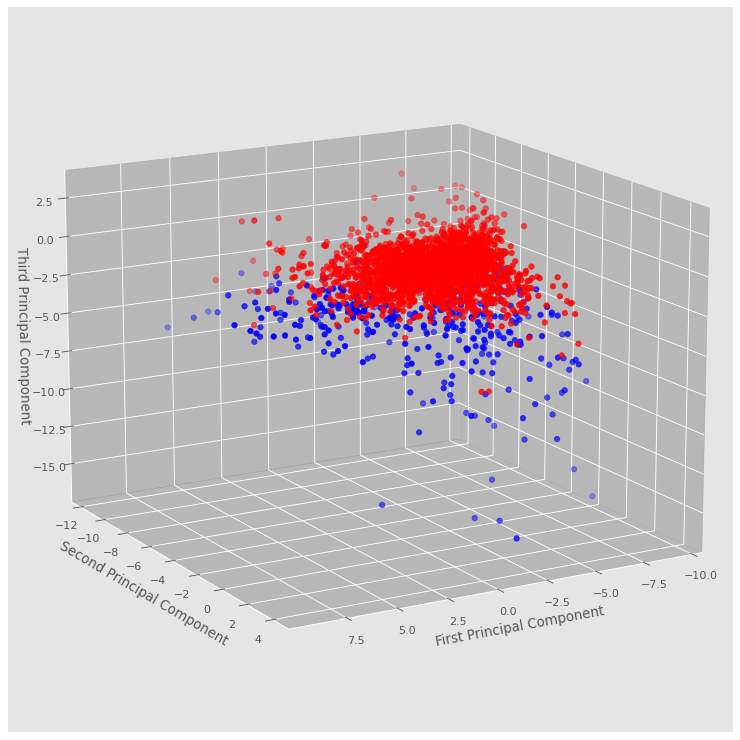

In [9]:
# for 3-D plotting
from mpl_toolkits.mplot3d import Axes3D

# create figure and axes objects
fig = plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

# plot trump counties as red dots
ax.scatter(xs=train_X_pca.loc[train_labels == 'Trump'].iloc[:, 0], 
           ys=train_X_pca.loc[train_labels == 'Trump'].iloc[:, 1], 
           zs=train_X_pca.loc[train_labels == 'Trump'].iloc[:, 2],
           s=25,
           c='r')
# plot clinton counties as blue dots
ax.scatter(xs=train_X_pca.loc[train_labels == 'Clinton'].iloc[:, 0], 
           ys=train_X_pca.loc[train_labels == 'Clinton'].iloc[:, 1], 
           zs=train_X_pca.loc[train_labels == 'Clinton'].iloc[:, 2],
           s=25,
           c='b')

# add axis lebels
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# Set the background color of the panes
ax.w_xaxis.set_pane_color((0.6, 0.6, 0.6, 0.6))
ax.w_yaxis.set_pane_color((0.6, 0.6, 0.6, 0.6))
ax.w_zaxis.set_pane_color((0.6, 0.6, 0.6, 0.6))

# set the viewing angle
ax.view_init(15, 60)

# display the plot
plt.show();

Now it is time to train and test the K-NN classifier on un-transformed data, and the lower dimensional representation of the data using PCA. Here we can see that the the K-NN classifier trained on the data transformed by the first 6 principal components has an out-of-sample accuracy that is 4 percentage points higher than the model trained on the un-transformed data! 

By finding a few linear combinations of the variables, we were able to construct a space where are data points are closer together, improving the K-NN model's accuracy!

In [10]:
# import the knn classifier for sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
# import accuracy score for measuring accuracy
from sklearn.metrics import accuracy_score

# create an instance of the sklearn knn classifier using inverse-distance weighting using Euclidean distance
# (metric = minkowski with p = 2)
knnc = KNeighborsClassifier(n_neighbors=5, 
                            weights='distance', 
                            algorithm='auto', 
                            leaf_size=30, 
                            p=2, 
                            metric='minkowski',
                            metric_params=None, 
                            n_jobs=-1)

In [11]:
# train a model on the non-transformed training data
knnc_no_pca = knnc.fit(train_X, train_labels)
# get test predicitons for the non-transformed data
test_preds_no_pca = knnc_no_pca.predict(test_X)

# train a model on the transformed training data
knnc_pca = knnc.fit(train_X_pca, train_labels)
# get test predicitons for the transformed data
test_preds_pca = knnc_pca.predict(test_X_pca)

In [12]:
# get the accuracy score of each model
no_pca_accuracy = accuracy_score(test_labels, test_preds_no_pca, normalize=True)
pca_accuracy = accuracy_score(test_labels, test_preds_pca, normalize=True)

print(f'The model trained on the raw data predicted {round(100*no_pca_accuracy, 1)}% of {test_labels.shape[0]}',
     'out-of-sample labels correctly.')
print(f'The model trained on the data transformed using PCA predicted {round(100*pca_accuracy, 1)}% of', 
      f'{test_labels.shape[0]} out-of-sample labels correctly.')

The model trained on the raw data predicted 88.0% of 609 out-of-sample labels correctly.
The model trained on the data transformed using PCA predicted 92.0% of 609 out-of-sample labels correctly.


I hope you now have an intuitive understanding of what PCA does, why it's useful, how to estimate it (if for some reason you don't want to use a fast and stable implementation from a source like scikit-learn), and how to apply it to a real problem. Thanks for reading to the end!